In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [3]:
# load all the data files

allergy_customer = pd.read_csv('ODL_ALLERGY_CUSTOMER.csv')
allergy = pd.read_csv('ODL_ALLERGY.csv')
order_item = pd.read_csv('ODL_ORDER_ITEM.csv')
order =pd.read_csv('ODL_ORDER.csv')
orderable = pd.read_csv('ODL_ORDERABLES.csv')
restaurant = pd.read_csv('ODL_RESTAURANT.csv')


In [4]:
# only use the columns we need
order_item = order_item[['order_id', 'amount', 'data_id', 'orderable_id']]
order = order[['restaurant_id', 'creation_date', 'customer_id', 'data_id']]
order['creation_date'] = pd.to_datetime(order['creation_date'])
orderable = orderable[['price', 'restaurant_id', 'data_id', 'name']]

# We join order_item and order along order_id
df = order_item.set_index('order_id').join(order.set_index('data_id'))
df.index.name = 'order_id'
df = df.reset_index().set_index('data_id').sort_index()

#We join df and orderable along orderable_id
df_2 = df.reset_index().set_index('orderable_id').join(orderable.drop(columns=['restaurant_id']).set_index('data_id'))
df_2.index.name = 'orderable_id'
df_2 = df_2.reset_index().set_index('data_id')
df_2 = df_2.sort_index()

In [5]:
rest = restaurant[['data_id' , 'city']]

# We join df_2 with rest aling 'restaurant_id'
df_total = df_2.reset_index().set_index('restaurant_id').join(rest.set_index('data_id'))
df_total.index.name = 'restaurant_id'
df_total = df_total.reset_index().set_index('data_id')

In [6]:
df_total.head()

,restaurant_id,orderable_id,order_id,amount,creation_date,customer_id,price,name,city
data_id,,,,,,,,,
0,0,4,0,3,2017-04-03 14:20:00,23,18.1,Croft 90,New York
1,0,3,0,2,2017-04-03 14:20:00,23,22.5,"Mango Carnitas Enchiladas, slowly simmered lea...",New York
2,0,2,0,3,2017-04-03 14:20:00,23,27.7,Cold Poached Atlantic Salmon: three vegetable ...,New York
3,0,2,1,3,2017-04-03 14:53:00,27,27.7,Cold Poached Atlantic Salmon: three vegetable ...,New York
4,0,4,1,1,2017-04-03 14:53:00,27,18.1,Croft 90,New York


In [7]:
df_total['paid']= df_total['price']*df_total['amount']

In [8]:
df_NY = df_total[df_total['city']=='New York']
df_SF = df_total[df_total['city']=='San Francisco']

## Most popular dishes

Dishes are ranked in two ways: by amount sold and by revenue generated. The tabels for both cities for dishes sorted by revenue generated are more alike.

### Most popular dishes by amount sold

In [9]:
pop_NY = df_NY[['amount','name']].groupby('name').sum('amount').sort_values('amount',ascending=False)
pop_SF = df_SF[['amount','name']].groupby('name').sum('amount').sort_values('amount',ascending=False)

In [10]:
pop_NY.head(10)

,amount
name,
Shrimp Cocktail,2029
Tofu Honey Pie. tofu with Cream Cheese and Blueberry Topping,2014
Joes Grilled Chicken,1930
"Warm asparagus, vinaigrette",1777
Soda (Can),1621
Onion Soup GratinÃƒÂ©e,1611
Big Muffins...1.65: Honey Raisin Bran Ã¢Â€Â¢ Blueberry Ã¢Â€Â¢ Banana Nut Ã¢Â€Â¢ Carrot Ã¢Â€Â¢ Cranberry Orange Ã¢Â€Â¢ Corn Ã¢Â€Â¢ Apple Cinnamon Raisin Ã¢Â€Â¢ Lemon Popply Ã¢Â€Â¢ Almond Ã¢Â€Â¢ Chocolate Chip,1597
Jalapeno Smoked Salmon,1584
"Chardonnay, Logan Sleepy Hollow Vineyard, 1998, Monterey",1555


In [11]:
pop_SF.head(10)

,amount
name,
Steamed Broccoli w. Shrimp & Chicken,1987
CHILLED BUTTERNUT SQUASH SOUP WITH DILL,1768
Steamed Broccoli w. Chicken,1668
"Wraps: W6 Italian Tuna Wrap (No Mayo No Oil), Plum Tomato, Leaf Lettuce & Sprouts ... 5.95",1620
"KRUG, GRANDE CUVEE, BRUT CHAMPAGNE NV",1560
Manhattan,1525
Chocolate Raspberry Cake,1522
Chicken w. Garlic Sauce,1469
Cream of Cauliflower Soup,1468


### Most popular dishes by revenue

In [14]:
pop_NY_rev = df_NY.groupby('name')[['paid']].sum().sort_values('paid', ascending=False)
pop_NY_rev.head(20)

,paid
name,
Jalapeno Smoked Salmon,46869.4
"Veuve Cliquot, La Grande Dame, 1989",45473.6
Tofu Honey Pie. tofu with Cream Cheese and Blueberry Topping,44795.2
Shellfish Platter,44479.2
Strawberry Italian Soda,44141.8
Joes Grilled Chicken,42895.2
Joes Buffalo Tenderloins,41382.4
Moo Shu Pork w. 4 Pancakes,40304.7
"Chardonnay, Logan Sleepy Hollow Vineyard, 1998, Monterey",39817.6


In [15]:
pop_SF_rev = df_SF.groupby('name')[['paid']].sum().sort_values('paid', ascending=False)
pop_SF_rev.head(20)

,paid
name,
Steamed Broccoli w. Shrimp & Chicken,48563.5
CHILLED BUTTERNUT SQUASH SOUP WITH DILL,44347.9
Cream of Cauliflower Soup,44161.4
"Merlot 1999, Bogle (California)",40708.1
Beefeater Gin,40669.7
St. Jacques PolÃƒÂ©es,40057.0
Steamed Broccoli w. Chicken,39849.1
"KRUG, GRANDE CUVEE, BRUT CHAMPAGNE NV",38138.1
Manhattan,37259.7


In [26]:
dish_names = list(df_total.groupby('name')[['paid']].sum().sort_values('paid', ascending=False).index)

### Popular dishes per restaurant

by amount

In [139]:
pop_per_restaurant = df_total[['restaurant_id', 'amount','name']].groupby(['restaurant_id','name']).sum('amount').sort_values(['restaurant_id','amount'])
pop_per_restaurant

amount
restaurant_id name                                                      
0             Croft 90                                               966
              MUSSELS TOSCANE fresh tomatoes                         999
              Mango Carnitas Enchiladas, slowly simmered lean...     999
              Drambuie                                              1037
              Roast Pork w. Mushrooms                               1101
...                                                                  ...
423           Veal Chop - wild mushroom sauce, aparagus, and ...       4
              Cuvee Dom Perignon 1990, Epernay                         6
              Domaine Carneros, Brut, 1992, Napa                       9
424           Santa Cristina, Villa Antinori                           2
              Vosne Romanee, D. Rion, 1994                             3

[2781 rows x 1 columns]

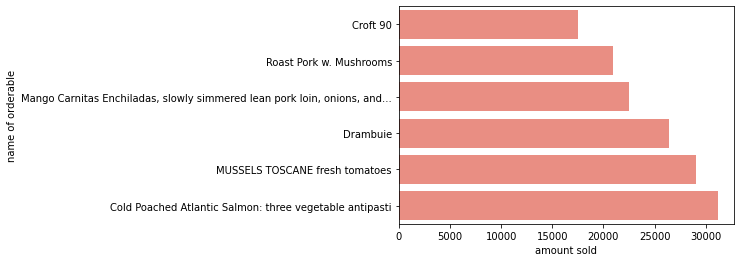

In [184]:
am_table = pop_per_restaurant.loc[0]
am_table = am_table.reset_index()
am_table['abbrev_name'] = am_table['name'].map(lambda x: x[:70]+'...' if len(x)>70 else x)
am_table[['abbrev_name', 'paid']].set_index('abbrev_name').sort_values('paid', ascending=False)
sns.barplot(y='abbrev_name', x='paid', data=am_table, color='salmon')
plt.ylabel('name of orderable')
plt.xlabel('amount sold')
plt.show()

by revenue

In [142]:
pop_rev_per_restaurant = df_total[['restaurant_id', 'paid','name']].groupby(['restaurant_id','name']).sum('paid').sort_values(['restaurant_id','paid'])
pop_rev_per_restaurant

paid
restaurant_id name                                                       
0             Croft 90                                            17484.6
              Roast Pork w. Mushrooms                             20919.0
              Mango Carnitas Enchiladas, slowly simmered lean...  22477.5
              Drambuie                                            26443.5
              MUSSELS TOSCANE fresh tomatoes                      29070.9
...                                                                   ...
423           Veal Chop - wild mushroom sauce, aparagus, and ...    153.2
              Cuvee Dom Perignon 1990, Epernay                      192.0
              Domaine Carneros, Brut, 1992, Napa                    330.3
424           Santa Cristina, Villa Antinori                         21.0
              Vosne Romanee, D. Rion, 1994                           43.8

[2781 rows x 1 columns]

In [144]:
pop_rev_per_restaurant.loc[0]

,paid
name,
Croft 90,17484.6
Roast Pork w. Mushrooms,20919.0
"Mango Carnitas Enchiladas, slowly simmered lean pork loin, onions, and spices layered between two blue corn tortillas with mango chutney, salsa, sour cream, and white cheddar cheese smothered with green chile and garnished with sour cream and corn salsa served with pinto beans and Basmati rice",22477.5
Drambuie,26443.5
MUSSELS TOSCANE fresh tomatoes,29070.9
Cold Poached Atlantic Salmon: three vegetable antipasti,31190.2


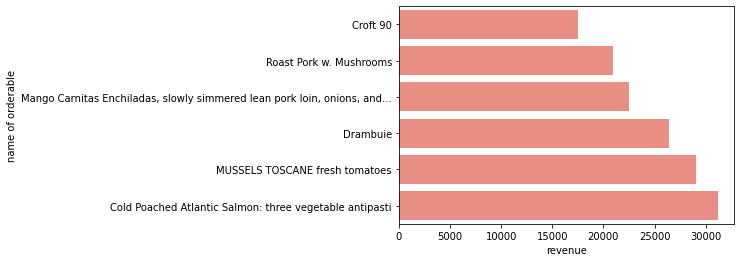

In [183]:
rev_table = pop_rev_per_restaurant.loc[0]
rev_table = rev_table.reset_index()
rev_table['abbrev_name'] = rev_table['name'].map(lambda x: x[:70]+'...' if len(x)>70 else x)
rev_table[['abbrev_name', 'paid']].set_index('abbrev_name').sort_values('paid', ascending=False)
sns.barplot(y='abbrev_name', x='paid', data=rev_table, color='salmon')
plt.ylabel('name of orderable')
plt.xlabel('revenue')
plt.show()

### nr of sales of orderable distributed by price

In [27]:
df_sales = df_total[['price', 'amount', 'name', 'city']]

In [86]:
# choose a dish to get info from or pick a name from the dish_names list of names

# dish = 'Shrimp Cocktail'
dish = dish_names[30]

dish_price_distribution = df_sales[df_sales['name']==dish].groupby('price').sum()
dish_price_distribution

,amount
price,
8.7,212
9.9,79
21.3,264
27.5,942
34.2,233


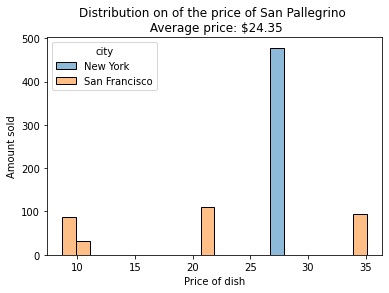

In [89]:
# calculate average price
avg_price  = (dish_price_distribution.reset_index()['price']*dish_price_distribution.reset_index()['amount']).sum()
avg_price = np.round(avg_price/dish_price_distribution['amount'].sum(),2)
avg_price


# Calculate the binwidth of the histogram

prices = list(dish_price_distribution.index)
width = prices[-1]-prices[0]
for i in range(len(prices)-1):
    width = min(width, prices[i+1]-prices[i])

# create the figure


sns.histplot(x='price', data=df_sales[df_sales['name']==dish], hue='city', binwidth=width)

plt.title(f'Distribution on of the price of {dish} \n Average price: ${avg_price}')

plt.ylabel('Amount sold')
plt.xlabel('Price of dish')
plt.show()

## trends in dishes sold

### Amount dishes sold per month

In [132]:
s = df_NY[['creation_date', 'amount']].resample('M', on='creation_date').sum()
t = df_SF[['creation_date', 'amount']].resample('M', on='creation_date').sum()
amount_per_month = s.join(t, lsuffix='_NY', rsuffix='_SF')
amount_per_month.head()

,amount_NY,amount_SF
creation_date,,
2017-04-30,2947,3337
2017-05-31,5530,6804
2017-06-30,6610,8066
2017-07-31,12819,15976
2017-08-31,13519,17138


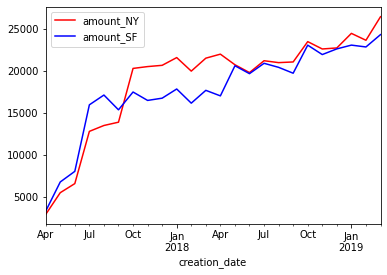

In [133]:
plt.figure()

amount_per_month.amount_NY.plot(color='red')

amount_per_month.amount_SF.plot(color='blue')

plt.legend()
plt.show()

### Trend per dish

Still working on this part

In [101]:
df_sales_trends = df_total[['creation_date', 'amount', 'name', 'city']]
df_trends = df_sales_trends.groupby('name').resample('M', on='creation_date').sum()
df_trends

amount
name                                              creation_date        
1 lb Chilled Lobster                              2017-07-31         52
                                                  2017-08-31         50
                                                  2017-09-30         52
                                                  2017-10-31         50
                                                  2017-11-30         59
...                                                                 ...
warm valrhona chocolate cake with green tea sauce 2018-11-30         10
                                                  2018-12-31         13
                                                  2019-01-31         10
                                                  2019-02-28         11
                                                  2019-03-31         10

[28423 rows x 1 columns]

In [129]:
# choose a dish

dish = dish_names[1]
df_trends_per_dish = df_trends.loc[dish]
df_trends_per_dish

,amount
creation_date,
2017-04-30,65
2017-05-31,122
2017-06-30,72
2017-07-31,119
2017-08-31,119
2017-09-30,67
2017-10-31,88
2017-11-30,78
2017-12-31,79


In [185]:
s = df_NY[['creation_date', 'amount', 'paid', 'name']].groupby('name').resample('M', on='creation_date').sum()
t = df_SF[['creation_date', 'amount', 'paid', 'name']].groupby('name').resample('M', on='creation_date').sum()
dish_amount_per_month = s.join(t, lsuffix='_NY', rsuffix='_SF')
dish_amount_per_month.head()

amount_NY  paid_NY  amount_SF  paid_SF
name                 creation_date                                        
1 lb Chilled Lobster 2017-07-31            32    905.6       20.0    568.0
                     2017-08-31            26    735.8       24.0    681.6
                     2017-09-30            27    764.1       25.0    710.0
                     2017-10-31            31    877.3       19.0    539.6
                     2017-11-30            40   1132.0       19.0    539.6

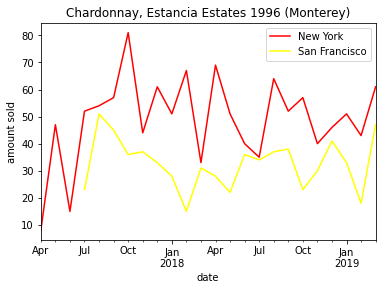

In [186]:
name = dish_names[10]

dish_amount_per_month.loc[name]['amount_NY'].plot(color='red', label = 'New York')
dish_amount_per_month.loc[name]['amount_SF'].plot(color='yellow', label = 'San Francisco')
plt.title(name)
plt.xlabel('date')
plt.ylabel('amount sold')
plt.legend()
plt.show()

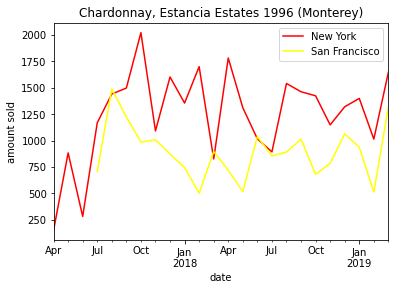

In [187]:
name = dish_names[10]

dish_amount_per_month.loc[name]['paid_NY'].plot(color='red', label = 'New York')
dish_amount_per_month.loc[name]['paid_SF'].plot(color='yellow', label = 'San Francisco')
plt.title(name)
plt.xlabel('date')
plt.ylabel('amount sold')
plt.legend()
plt.show()